In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.feature_names)
print(boston.data.shape) #it gives the number of (rows,columns) in the dataset

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)


In [3]:
print(boston.DESCR)  #reading and understanding the dataset
                     #boston.target is the  Median value of owner-occupied homes in $1000's

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
bos = pd.DataFrame(boston.data,columns=boston.feature_names)   #converting into a data frame using pandas
bos['PRICE']=boston.target    #adding one more column 'PRICE' whose value is = 'boston.target' as it has the price of all the houses 
print(bos)

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   

In [5]:
print(bos.corr())   #see the correlation between the given 'PRICE'(target) attribute and the rest of the attributes
                    #and choose the one with highest value to plot. Here RM has the highest i.e 0.695360 
                    #Note - the correlation values lie between -1 to +1(inclusive)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199458  0.404471 -0.055295  0.417521 -0.219940  0.350784   
ZN      -0.199458  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.404471 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055295 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.417521 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219940  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.350784 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.377904  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.622029 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.579564 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.288250 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.377365  0.175520 

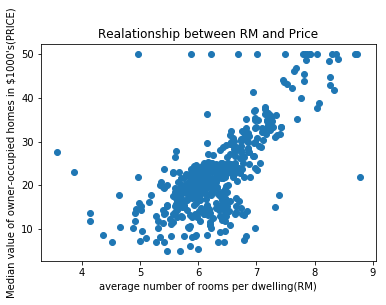

In [6]:
plt.scatter(bos.RM,boston.target)
plt.xlabel("average number of rooms per dwelling(RM)")
plt.ylabel("Median value of owner-occupied homes in $1000's(PRICE)")
plt.title("Realationship between RM and Price")
plt.show()

In [7]:
#dropping the last column i.e 'PRICE' since we are now going to fit the data into fit function
bos.drop(axis=1,columns='PRICE',inplace= True)

In [8]:
from sklearn.linear_model import LinearRegression
clf= LinearRegression()
X = bos              # here X is the collection of independent attributes i.e all the 13 columns 
y = boston.target    # y is the target variable 
clf.fit(X,y)
predictions = clf.predict(X)

df = pd.DataFrame(boston.target,columns=['Dataset_price'])   #creating one new dataframe with 1 column i.e Dataset_Price        
df['Predicted_Price'] = predictions
print(df)

     Dataset_price  Predicted_Price
0             24.0        30.008213
1             21.6        25.029861
2             34.7        30.570232
3             33.4        28.608141
4             36.2        27.942882
5             28.7        25.259400
6             22.9        23.004340
7             27.1        19.534756
8             16.5        11.516965
9             18.9        18.919815
10            15.0        18.995827
11            18.9        21.589709
12            21.7        20.905349
13            20.4        19.555359
14            18.2        19.283796
15            19.9        19.300002
16            23.1        20.528900
17            17.5        16.909675
18            20.2        16.170674
19            18.2        18.407816
20            13.6        12.520405
21            19.6        17.671046
22            15.2        15.829349
23            14.5        13.803683
24            15.6        15.677081
25            13.9        13.379164
26            16.6        15

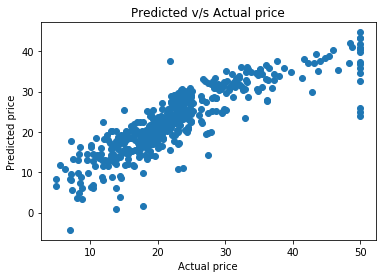

In [9]:
plt.scatter(df.Dataset_price,df.Predicted_Price)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Predicted v/s Actual price")
plt.show()

In [10]:
clf.intercept_

36.491103280363404

In [11]:
clf.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [12]:
# finding accuracy of the model...X= feature matrix and y = target values
clf.score(X,y) 

0.7406077428649428